## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número:

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2Data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "X":             dados bi-dimensionais (840 amostras)
### 2. "y":              classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain": array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest": array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Com a métrica de distância de cosseno, calcule a matriz de confusão e o número total de erros nos dados de teste.

dict_keys(['X', 'y', 'foldTrain', 'foldTest'])
[0. 1. 2. 3.]
(2, 840)
Média Classe 0:  [ 5.14228406 -3.01407307]
Média Classe 1:  [-3.25743758 -2.53544477]
Média Classe 2:  [-1.68691942  1.46970542]
Média Classe 3:  [0.11366889 5.28098864]


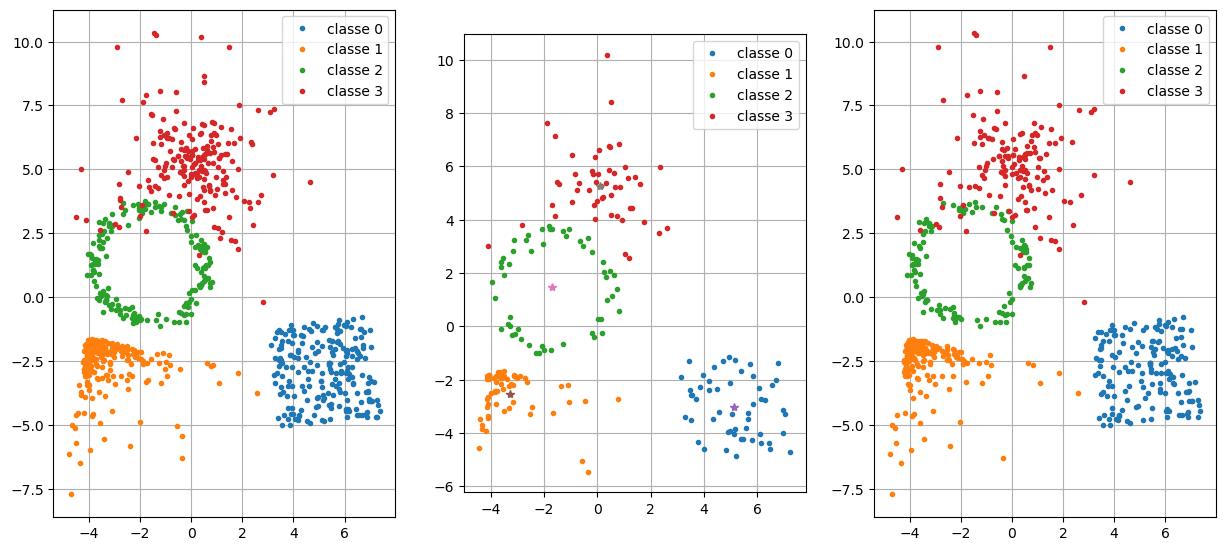

In [30]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

fN = '/Users/anaso/Documents/AA/AA-22-23/_old/Laboratorios/Lab2/Lab2Data.p'
D = pickle.load(open(fN, 'rb'))

print(D.keys())

X = D['X']
y = D['y']

print(np.unique(y))
print(X.shape)
train = D['foldTrain']
test = D['foldTest']

X_treino = X[:, train]
y_treino = y[train]
X_teste = X[:, test]
y_teste = y[test]

m0 = np.mean(X_treino[:, y_treino==0], axis=1)
m1 = np.mean(X_treino[:, y_treino==1], axis=1)
m2 = np.mean(X_treino[:, y_treino==2], axis=1)
m3 = np.mean(X_treino[:, y_treino==3], axis=1)

print("Média Classe 0: ", m0)
print("Média Classe 1: ", m1)
print("Média Classe 2: ", m2)
print("Média Classe 3: ", m3)

plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.plot(X[0, y==0], X[1,y==0], '.')
plt.plot(X[0, y==1], X[1,y==1], '.')
plt.plot(X[0, y==2], X[1,y==2], '.')
plt.plot(X[0, y==3], X[1,y==3], '.')
plt.legend(["classe 0", "classe 1", "classe 2", "classe 3"])
plt.axis('scaled')
plt.grid(True)


plt.subplot(132)
plt.plot(X_treino[0, y_treino==0], X_treino[1,y_treino==0], '.')
plt.plot(X_treino[0, y_treino==1], X_treino[1,y_treino==1], '.')
plt.plot(X_treino[0, y_treino==2], X_treino[1,y_treino==2], '.')
plt.plot(X_treino[0, y_treino==3], X_treino[1,y_treino==3], '.')
plt.plot(m0[0], m0[1], '*')
plt.plot(m1[0], m1[1], '*')
plt.plot(m2[0], m2[1], '*')
plt.plot(m3[0], m3[1], '*')
plt.legend(["classe 0", "classe 1", "classe 2", "classe 3"])
plt.axis('scaled')
plt.grid(True)


plt.subplot(133)
plt.plot(X_teste[0, y_teste==0], X_teste[1,y_teste==0], '.')
plt.plot(X_teste[0, y_teste==1], X_teste[1,y_teste==1], '.')
plt.plot(X_teste[0, y_teste==2], X_teste[1,y_teste==2], '.')
plt.plot(X_teste[0, y_teste==3], X_teste[1,y_teste==3], '.')
plt.legend(["classe 0", "classe 1", "classe 2", "classe 3"])
plt.axis('scaled')
plt.grid(True)

In [31]:
# Distância euclediana
D0 = np.sqrt(np.sum((X_teste-m0[:, np.newaxis])**2, axis=0))
D1 = np.sqrt(np.sum((X_teste-m1[:, np.newaxis])**2, axis=0))
D2 = np.sqrt(np.sum((X_teste-m2[:, np.newaxis])**2, axis=0))
D3 = np.sqrt(np.sum((X_teste-m3[:, np.newaxis])**2, axis=0))

D = np.vstack((D0, D1, D2, D3))

ye = np.argmin(D, axis=0)


#print(y_teste.shape)
#print(ye.shape)

CM = confusion_matrix(y_teste, ye)
print("Matrix de Confusão:\n", CM)

erros = np.sum(y_teste!=ye)

print("Número de erros no teste: ", erros)

Matrix de Confusão:
 [[160   0   0   0]
 [  3 186   0   0]
 [  0  16 104   4]
 [  1   0  16 132]]
Número de erros no teste:  40


In [32]:
# Distância de cosseno

norma_dados_teste = np.sqrt(np.sum(X_teste**2,axis=0))
dados_normalizados = X_teste/norma_dados_teste
m0normalizada = m0/np.sqrt(np.sum(m0**2))
m1normalizada = m1/np.sqrt(np.sum(m1**2))
m2normalizada = m2/np.sqrt(np.sum(m2**2))
m3normalizada = m3/np.sqrt(np.sum(m3**2))
M=np.vstack((m0normalizada, m1normalizada, m2normalizada, m3normalizada))
D=1-np.dot(M,dados_normalizados)

ye = np.argmin(D, axis=0)

CM = confusion_matrix(y_teste, ye)
print("Matrix de Confusão:\n", CM)

erros = np.sum(y_teste!=ye)

print("Número de erros no teste: ", erros)

Matrix de Confusão:
 [[160   0   0   0]
 [  5 184   0   0]
 [  1  39  45  39]
 [  1   0  13 135]]
Número de erros no teste:  98


# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

In [49]:
K = 1

print(X_treino.shape, y_treino.shape)
print(X_teste.shape, y_teste.shape)

kNN = KNeighborsClassifier(n_neighbors=K)

kNN.fit(X_treino.T, y_treino)

ye = kNN.predict(X_teste.T)


CM = confusion_matrix(y_teste, ye)
print("Matriz de Confusão: \n", CM)
print("Erros: ", np.sum(y_teste != ye))
prob_erro = np.sum(y_teste != ye) / y_teste.shape[0]
print("Erros: ", np.round(prob_erro*100, 2), "%")

plt.figure(figsize=(15, 15))
plt.plot(X_teste[0, y_teste==0], X_teste[1,y_teste==0], '.')
plt.plot(X_teste[0, y_teste==1], X_teste[1,y_teste==1], '.')
plt.plot(X_teste[0, y_teste==2], X_teste[1,y_teste==2], '.')
plt.plot(X_teste[0, y_teste==3], X_teste[1,y_teste==3], '.')
plt.plot(X_teste[0,y_teste!=ye], X_teste[1,y_teste!=ye],'ok',alpha=.4)
plt.axis('scaled')

(218, 2) (218,)
(622, 2) (622,)


ValueError: Found input variables with inconsistent numbers of samples: [2, 218]